In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6" color="red"> ch10. N차원배열(Numby 배열) 다루기 </font></b>

# 4절. 복사와 뷰

## 4.1 할당

In [1]:
import numpy as np
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [4]:
b = a

In [5]:
a.shape, a.ndim, id(a), type(a)

((12,), 1, 1951202654512, numpy.ndarray)

In [7]:
b.shape, b.ndim, id(b), type(b)

((12,), 1, 1951202654512, numpy.ndarray)

In [8]:
a is b

True

In [9]:
a == b

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [11]:
np.all(a==b)

True

In [12]:
b.shape = (3,4) # 할당받은 b의 shape을 수정

In [13]:
a.shape, a.ndim, id(a), type(a)

((3, 4), 2, 1951202654512, numpy.ndarray)

In [14]:
b.shape, b.ndim, id(b), type(b)

((3, 4), 2, 1951202654512, numpy.ndarray)

## 4.2 얕은 복사 : 뷰(View)

In [16]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [17]:
# 얕은 복사는 틀을 복사하는것. 원래 깊은복사는 a의 1,2,3,4,5,6,7,8,9,10,11 과 행열까지 다 복사하고, 얕은복사는 데이터는 그대로, 행열의 형식만 변경하는 것.

c = a.view()
print(id(a), id(c))

1951256881136 1951256882480


In [18]:
c == a

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [20]:
# a와 c의 0번째 방에는 0이 들어있는데 c의 0번재 값을 바꾸면 a의 값도 바뀜. 그러나 틀만 바꾸는건 c만 바뀜.

c.shape = (2,6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [19]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [21]:
c[1, ::2] = [9,9,9] # 1행의 짝수번째 열 변경(9)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 9,  7,  9,  9,  9, 11]])

In [22]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  9,  7],
       [ 9,  9,  9, 11]])

## 4.3 깊은복사

In [32]:
a = np.array([[5, 4, 13, 0],
             [99, 6, 16, 1],
             [20, 5, 14, 0]])
a

array([[ 5,  4, 13,  0],
       [99,  6, 16,  1],
       [20,  5, 14,  0]])

In [33]:
# 독립변수 추출
# 변수를 x소문자가 아니라 X대문자로 쓰는 이유는 독립변수의 가짓수가 여러개일때 대문자 사용

# X = a[:, :-1] # 슬라이싱이 될 때, 뷰가 반환됨(얕은복사)
X = a[:, :-1].copy() # 깊은복사
# X = np.array(a[:, :-1], copy = True) 깊은복사지만 이렇게 안씀
X

array([[ 5,  4, 13],
       [99,  6, 16],
       [20,  5, 14]])

In [34]:
X[:, 0] = -9
X

array([[-9,  4, 13],
       [-9,  6, 16],
       [-9,  5, 14]])

In [35]:
a

array([[ 5,  4, 13,  0],
       [99,  6, 16,  1],
       [20,  5, 14,  0]])

# 5절. 고급인덱싱

## 5.1 인덱스 배열로 인덱싱

In [4]:
import numpy as np
a = np.arange(12)**2
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [6]:
a[[0,5,9]] # 인덱스자리에 리스트를 넣으면 원하는 것들만 뽑아낼 수 있음

array([ 0, 25, 81])

In [7]:
# 인덱싱하기 위한 값을 배열로 만듦

i = np.array([0,1,1,9])
a[i] # 결과는 i(인덱싱 배열)의 형태로 따라감

array([ 0,  1,  1, 81])

In [9]:
i = np.array([[0,1],
             [1,9]])
a[i] # 결과는 i(인덱싱 배열)의 형태로 따라감. 2차원에 넣었더니 2차원 배열이 됨.

array([[ 0,  1],
       [ 1, 81]])

In [10]:
a[i] = 10
a

array([ 10,  10,   4,   9,  16,  25,  36,  49,  64,  10, 100, 121])

In [11]:
a[i] += 10 # 1번 인덱스는 한번만 10 증가
a

array([ 20,  20,   4,   9,  16,  25,  36,  49,  64,  20, 100, 121])

In [12]:
# 색상
                  #  R G B
palette = np.array([[0,0,0],       # black
                   [255,0,0],      # red
                   [0,255,0],      # green
                   [0,0,255],      # blue
                   [255,255,255]]) # white

In [15]:
image_index = np.array([[4,4,4,0,0,0,0,4,4,4],
                        [4,0,0,4,4,4,4,0,0,4],
                        [0,0,4,4,4,4,4,4,0,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,4,4,4,4,4,4,0],
                        [0,4,4,2,4,4,2,4,4,0],
                        [4,0,4,4,2,2,4,4,0,4],
                        [4,4,0,4,4,4,4,0,4,4],
                        [4,4,4,0,0,0,0,4,4,4]])

image_data = palette[image_index]
image_data.shape

(10, 10, 3)

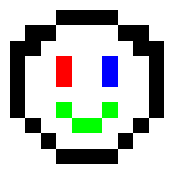

In [19]:
from matplotlib import pyplot as plt
# import matplotlib.pyplot as plt

plt.figure(figsize=(2,2)) # 이미지 사이즈 조정
plt.imshow(image_data)
plt.axis('off') # 축 안보이게하는것
plt.show() # imshow 

## 5.2 논리 배열을 이용한 인덱싱

In [20]:
a = np.arange(20)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [21]:
a % 2 == 0

array([ True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False])

In [23]:
# 논리 배열을 이용한 인덱싱시 True인 요소만 추출

a[a%2==0]

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [24]:
a[a>15]

array([16, 17, 18, 19])

# 6절. 선형대수

- 2차원 넘파이 배열을 행렬
    * 행렬곱 : @
    * 단위행렬 : np.eye(n) : n행n열 단위행렬
    * 전치행렬 : X.T, X.transpose()
    * 역행렬 : np.linalg.inv(X)

In [25]:
a = np.array([[1,2],
             [3,4]])
a

array([[1, 2],
       [3, 4]])

In [26]:
# a의 역행렬 : a의 역행렬 @ a = 단위행렬 (단위행렬이 정방형이기 때문에 역행렬도 정방형 배열에서만 구할 수 있음)

np.linalg.inv(a)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [27]:
np.linalg.inv(a) @ a

array([[ 1.00000000e+00,  4.44089210e-16],
       [-5.55111512e-17,  1.00000000e+00]])

In [31]:
# 정방행렬이 아니면 역행렬을 구할 수 없음

a = np.array([[1,2,1],
             [3,4,1]])
# np.linalg.inv(a) 에러. a가 정방행렬이 아니기 때문

a.T

array([[1, 3],
       [2, 4],
       [1, 1]])

In [32]:
# 전치행렬을 곱하면 정방행렬로 

a @ a.T , a.T @ a

(array([[ 6, 12],
        [12, 26]]),
 array([[10, 14,  4],
        [14, 20,  6],
        [ 4,  6,  2]]))

## 6.1 선형 연립 방정식 풀기(단변량 회귀분석) : 독립변수1, 데이터2

## 6.2 선형연립 방정식 풀기(단변량 회귀분석) : 독립변수1, 데이터n개